<a href="https://colab.research.google.com/github/takam1602/zeroPython/blob/main/chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from graphviz import Digraph

class State:
  def __init__(self,is_first,f,s):
    self.is_first  = is_first
    self.f = [max(f),min(f)]
    self.s = [max(s),min(s)]
    self.siblings = []
    self.is_drawn = False

  def __str__(self):
    s = str(self.f) + "\n" +str(self.s)
    if self.is_first:
      return "f\n" + s
    else:
      return "s\n" + s

  def params(self):
    return (self.is_first,self.f,self.s)

  def __eq__(self,other):
    return self.params() == other.params()
  
  def next_state(self,index):
    fi,si = index
    if self.f[fi] == 0 or self.s[si] == 0:
      return None
    d = self.f[fi] + self.s[si]
    f2 = self.f.copy()
    s2 = self.s.copy()

    if d >= 5:
      d = 0
    
    if self.is_first:
      s2[si] = d
    else:
      f2[fi] = d
    
    return State(not self.is_first,f2,s2)

In [9]:
s1 = State(True,[1,1],[1,1])
s2 = State(False,[1,1],[1,1])
s3 = State(True,[3,1],[2,4])

print(s1)
print(s2)
print(s3)

f
[1, 1]
[1, 1]
s
[1, 1]
[1, 1]
f
[3, 1]
[4, 2]


In [17]:
s1 = State(True,[1,1],[1,1])
s2 = State(True,[3,2],[3,1])
s3 = State(True,[1,0],[1,1])
print(s1.next_state((1,1)))
print(s2.next_state((1,0)))
print(s3.next_state((1,0)))

s
[1, 1]
[2, 1]
s
[3, 2]
[1, 0]
None


In [18]:
def move(parent, is_first, nodes):
    for i in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        child = parent.next_state(i)
        if child is None:
            continue
        if child in parent.siblings:
            continue
        s = str(child)
        child = nodes.get(s, child)
        nodes[s] = child
        parent.siblings.append(child)
        move(child, not is_first, nodes)

In [19]:
def make_tree():
    nodes = {}
    root = State(True, [1, 1], [1, 1])
    nodes[str(root)] = root
    move(root, True, nodes)
    return root

In [20]:
root = make_tree()
print(root)

f
[1, 1]
[1, 1]


In [21]:
def make_graph(node, g):
    if node.is_drawn:
        return
    node.is_drawn = True
    ns = str(node)
    if max(node.f) == 0:
        g.node(ns, color="#FF9999", style="filled")
    elif max(node.s) == 0:
        g.node(ns, color="#9999FF", style="filled")
    else:
        g.node(ns)
    for n in node.siblings:
        g.edge(ns, str(n))
        make_graph(n, g)
    return g

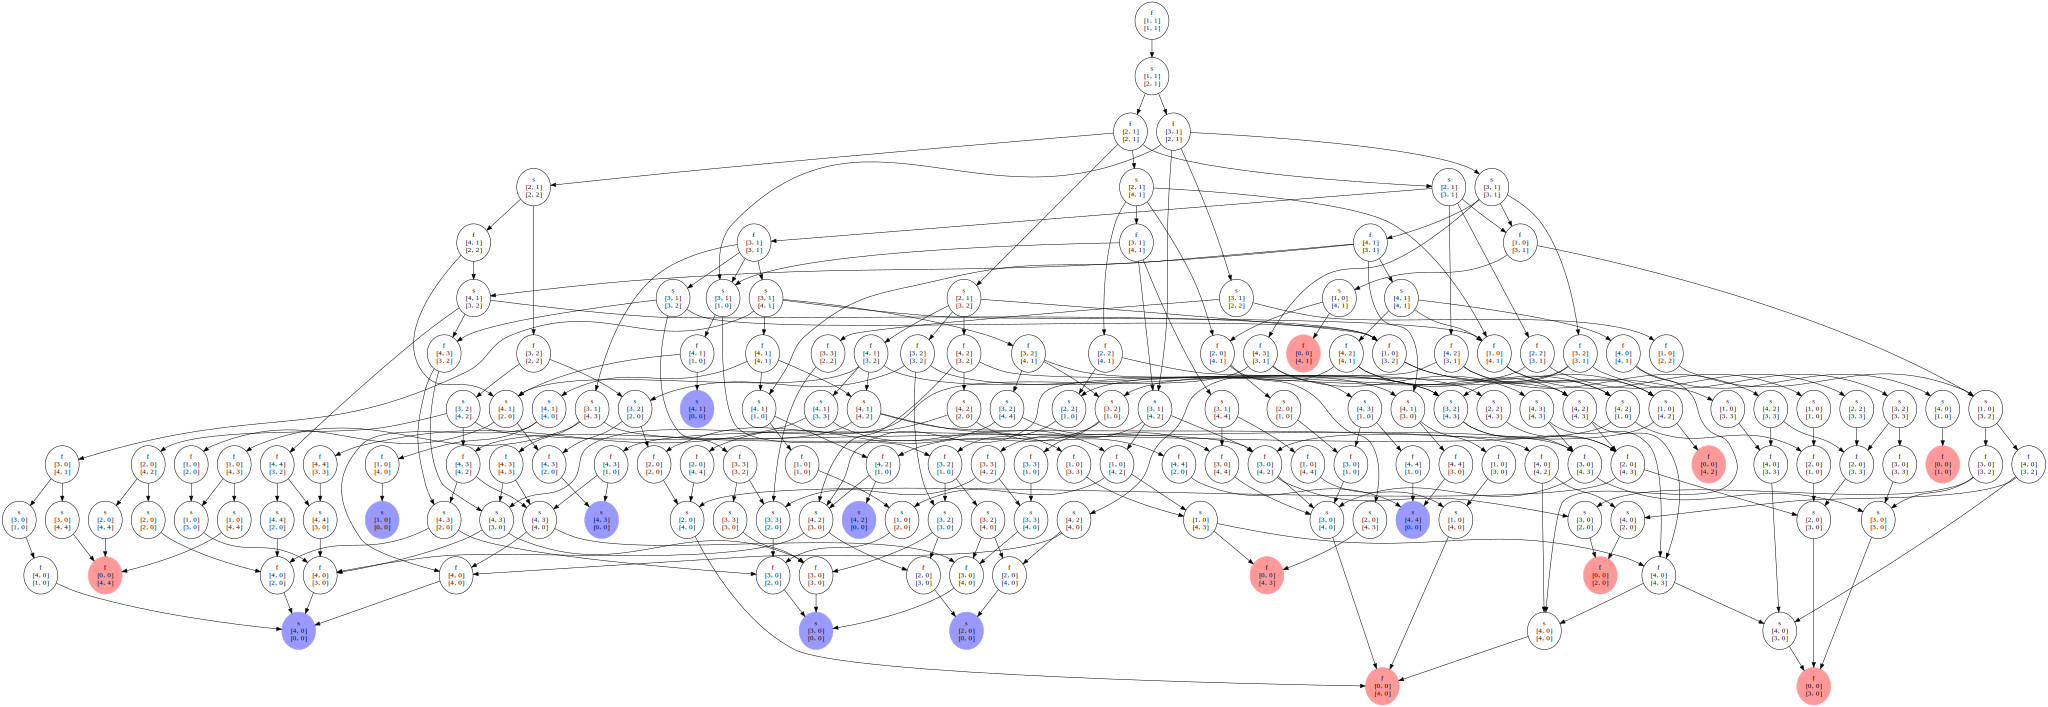

In [23]:
root = make_tree()
g = Digraph(format="png")
make_graph(root, g)

In [24]:
def prune(node):
    if max(node.s) == 0:
        return True
    if node.is_first:
        for n in node.siblings:
            if prune(n):
                return True
        return False
    if not node.is_first:
        sib = node.siblings.copy()
        for n in sib:
            if prune(n):
                node.siblings.remove(n)
        if not node.siblings:
            return True
    return False

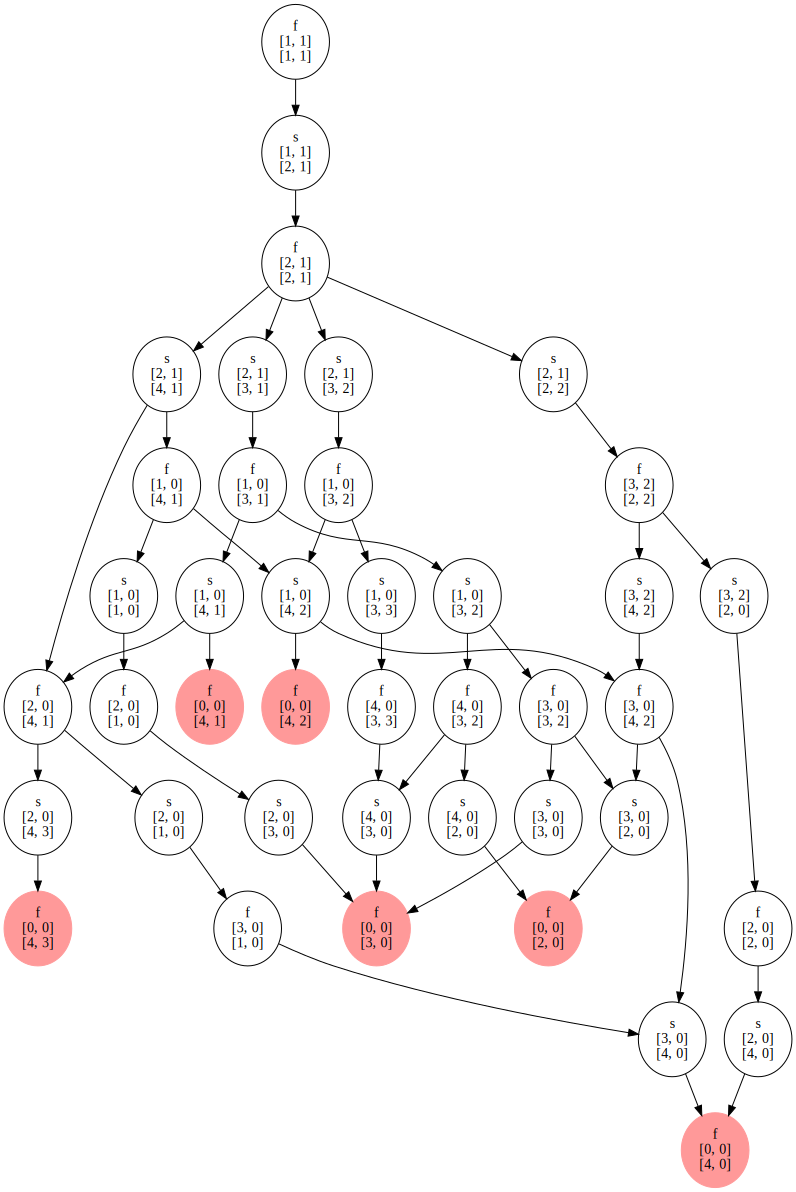

In [26]:
root = make_tree()
prune(root)
g = Digraph(format="png")
make_graph(root, g)